In [ ]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor

import requests


train_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module6/exercise/module6_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module6/exercise/module6_exercise_test.csv'


def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f"Downloaded {file_name} from {url}")

download_file(train_data_url, 'module6_exercise_train.csv')
download_file(test_data_url, 'module6_exercise_test.csv')

data_train = pd.read_csv('module6_exercise_train.csv', index_col="index")
data_test = pd.read_csv('module6_exercise_test.csv', index_col="index")

print("Shape train:", data_train.shape)
print("Shape test:", data_test.shape)

print("Colonnes train:", data_train.columns.tolist()[:10], "...")  # aperçu
print("Colonnes test:", data_test.columns.tolist()[:10], "...")

display(data_train.head())
display(data_test.head())


Downloaded module6_exercise_train.csv from https://www.raphaelcousin.com/modules/data-science-practice/module6/exercise/module6_exercise_train.csv
Downloaded module6_exercise_test.csv from https://www.raphaelcousin.com/modules/data-science-practice/module6/exercise/module6_exercise_test.csv
Shape train: (4000, 19)
Shape test: (1000, 18)
Colonnes train: ['09_30_00', '09_50_00', '10_10_00', '10_30_00', '10_50_00', '11_10_00', '11_30_00', '11_50_00', '12_10_00', '12_30_00'] ...
Colonnes test: ['09_30_00', '09_50_00', '10_10_00', '10_30_00', '10_50_00', '11_10_00', '11_30_00', '11_50_00', '12_10_00', '12_30_00'] ...


,09_30_00,09_50_00,10_10_00,10_30_00,10_50_00,11_10_00,11_30_00,11_50_00,12_10_00,12_30_00,12_50_00,13_10_00,13_30_00,13_50_00,14_10_00,14_30_00,14_50_00,15_10_00,end_of_day_return
index,,,,,,,,,,,,,,,,,,,
0,-3.345378,0.471913,0.111795,0.897695,-1.836632,0.853765,-1.169854,-0.515758,-0.672838,0.737822,-0.110476,0.120739,0.658008,-0.033507,-0.809134,-0.286582,-0.431717,-0.094759,-0.741115
1,0.325809,0.367349,-0.048372,-1.513650,0.355659,-3.117421,-0.881352,-0.007122,0.243771,0.016151,0.114610,-0.604529,0.148780,-0.229934,-0.506916,-0.604501,-0.348392,0.318222,1.174188
2,1.105315,1.767107,0.053923,0.001599,1.120131,-0.358522,-1.279510,-0.229908,0.918732,0.486627,0.143440,0.201272,-0.166683,-0.701750,-0.431819,-0.418378,0.645661,0.389446,-1.583453
3,-0.139515,0.400993,1.376735,0.248226,0.896831,-0.064874,-0.546736,-0.596431,-0.261391,0.233740,-0.242694,-0.713535,-0.331204,0.165809,-0.330894,0.883535,0.907813,-0.191447,1.614671
4,6.826520,2.643832,-0.686910,-0.175818,0.418767,-0.550301,-0.002805,-0.272078,0.798230,-0.481628,0.281879,0.762998,2.641929,-2.324375,-0.402507,0.155151,-0.467507,-0.596658,1.183321


,09_30_00,09_50_00,10_10_00,10_30_00,10_50_00,11_10_00,11_30_00,11_50_00,12_10_00,12_30_00,12_50_00,13_10_00,13_30_00,13_50_00,14_10_00,14_30_00,14_50_00,15_10_00
index,,,,,,,,,,,,,,,,,,
9000,-0.090754,-1.786981,-0.470490,0.545190,1.048661,2.133359,0.769342,0.829361,0.329543,-0.260203,0.557235,0.052095,-0.083066,-0.910045,-0.956864,0.058267,-0.406571,-0.647216
9001,7.611001,0.247861,-2.001656,-0.804107,-0.473829,1.259438,0.195555,0.101885,-1.077060,0.573665,-0.434945,-0.183208,0.463489,-0.559725,0.091081,-0.084349,0.096026,0.091618
9002,1.150194,0.091151,2.545506,0.775302,-1.025222,-0.894295,-0.440365,0.671856,0.428863,0.485069,-0.782287,-0.352444,0.257920,0.526284,-0.029759,-0.797493,0.743176,-0.220204
9003,-0.884874,-1.103034,0.755916,-0.412053,0.178287,-0.104350,-0.212248,0.081726,0.380151,0.005660,-0.501693,0.817424,-0.470671,0.140688,1.406956,1.754916,0.261623,-0.495981
9004,-0.589833,0.379596,-0.545424,-0.217812,-0.730794,-0.480085,0.470663,1.298896,-0.710654,0.867138,1.515816,0.197528,0.756792,0.090558,-0.819575,0.136961,0.023876,-0.451478


,09_30_00,09_50_00,10_10_00,10_30_00,10_50_00,11_10_00,11_30_00,11_50_00,12_10_00,12_30_00,12_50_00,13_10_00,13_30_00,13_50_00,14_10_00,14_30_00,14_50_00,15_10_00,end_of_day_return
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.141680,0.034964,0.020505,0.010436,-0.020574,0.002945,-0.010331,0.018534,0.005757,-0.016174,0.003401,-0.007827,0.009027,-0.021716,-0.018219,-0.019692,-0.012845,-0.005857,0.019466
std,5.257948,2.723808,1.352428,1.193797,1.066787,1.028344,0.980049,0.916572,0.793494,0.842957,0.748935,0.755444,0.742869,0.810765,0.743790,0.739733,0.735295,0.638472,0.962818
min,-153.020090,-14.173563,-11.462649,-8.014786,-6.884508,-6.174871,-7.197151,-12.981744,-5.170963,-10.867723,-5.270753,-6.466934,-3.780217,-7.522321,-3.853110,-4.318858,-6.421411,-3.553236,-8.210463
25%,-1.659958,-0.913043,-0.720355,-0.689361,-0.626834,-0.576174,-0.532172,-0.469984,-0.459903,-0.459817,-0.393010,-0.429838,-0.413955,-0.441057,-0.438892,-0.435665,-0.404864,-0.357411,-0.502152
50%,0.024667,-0.002644,0.008267,0.003442,-0.003890,-0.011194,-0.017745,0.014596,-0.010351,-0.034659,0.000475,-0.017674,0.004193,-0.015532,-0.030075,-0.031709,-0.007807,-0.004821,0.012860
75%,1.613584,0.925147,0.743400,0.680686,0.578904,0.582196,0.522556,0.492078,0.442551,0.413838,0.411547,0.397960,0.419423,0.412761,0.377625,0.391245,0.386953,0.342684,0.538451
max,42.788716,134.323450,10.271912,8.297362,12.070118,13.097849,10.406605,6.349618,4.765165,8.785591,7.543055,7.598514,5.996648,5.198389,6.403935,5.934699,5.290835,4.716630,11.468784


Valeurs manquantes train: 0
Valeurs manquantes test: 0


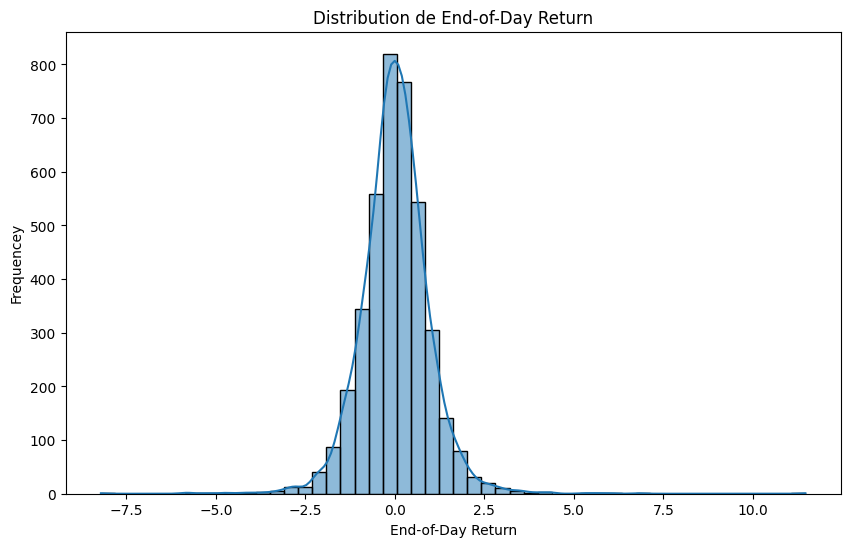

In [ ]:



display(data_train.describe())


print("Valeurs manquantes train:", data_train.isnull().sum().sum())
print("Valeurs manquantes test:", data_test.isnull().sum().sum())

plt.figure(figsize=(10, 6))
sns.histplot(data_train['end_of_day_return'], bins=50, kde=True)
plt.title('Distribution de End-of-Day Return')
plt.xlabel('End-of-Day Return')
plt.ylabel('Frequencey')
plt.show()

y = data_train.pop('end_of_day_return')
X = data_train.copy()

def weighted_accuracy(y_true, y_pred):

    weights = np.abs(y_true)

    sign_true = np.sign(y_true)
    sign_pred = np.sign(y_pred)

    correct_predictions = sign_true == sign_pred

    weighted_acc = np.sum(weights * correct_predictions) / np.sum(weights)
    return weighted_acc

def plot_results(mse_train, mse_test, w_acc_train, w_acc_test):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(mse_train, label="Train MSE", marker='o')
    plt.plot(mse_test, label="Test MSE", marker='o')
    plt.title("MSE over Folds")
    plt.xlabel("Fold")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.plot(w_acc_train, label="Train weighted_accuracy", marker='o')
    plt.plot(w_acc_test, label="Test weighted_accuracy", marker='o')
    plt.title("Weighted Accuracy over Folds")
    plt.xlabel("Fold")
    plt.ylabel("Weighted Accuracy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
def plot_multi_model_results(results):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))
    train_color = 'pink'
    test_color = 'blue'
    x = np.arange(len(results))
    width = 0.35
    ax1.set_title('Comparaison MSE', fontsize=16)
    ax1.set_ylabel('MSE')
    ax1.grid(True, alpha=0.7)


    ax2.set_title('Weighted Accuracy Comparaison', fontsize=16)
    ax2.set_ylabel('Weighted Accuracy')
    ax2.grid(True, alpha=0.7)

    for i, (model_name, scores) in enumerate(results.items()):
        mse_train = scores['mse_train']
        mse_test = scores['mse_test']
        w_acc_train = scores['w_acc_train']
        w_acc_test = scores['w_acc_test']


        ax1.bar(x[i] - width/2, np.mean(mse_train), width,
                color=train_color, alpha=0.7, label="Train" if i == 0 else "")
        ax1.bar(x[i] + width/2, np.mean(mse_test), width,
                color=test_color, alpha=0.7, label="Test" if i == 0 else "")


        ax2.bar(x[i] - width/2, np.mean(w_acc_train), width,
                color=train_color, alpha=0.7, label="Train" if i == 0 else "")
        ax2.bar(x[i] + width/2, np.mean(w_acc_test), width,
                color=test_color, alpha=0.7, label="Test" if i == 0 else "")

    ax1.set_xticks(x)
    ax1.set_xticklabels(results.keys(), rotation=45, ha='right')
    ax2.set_xticks(x)
    ax2.set_xticklabels(results.keys(), rotation=45, ha='right')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper left')

    plt.tight_layout()
    plt.show()


meilleur modèle: RandomForestRegressor avec mean weighted accuracy 0.5299


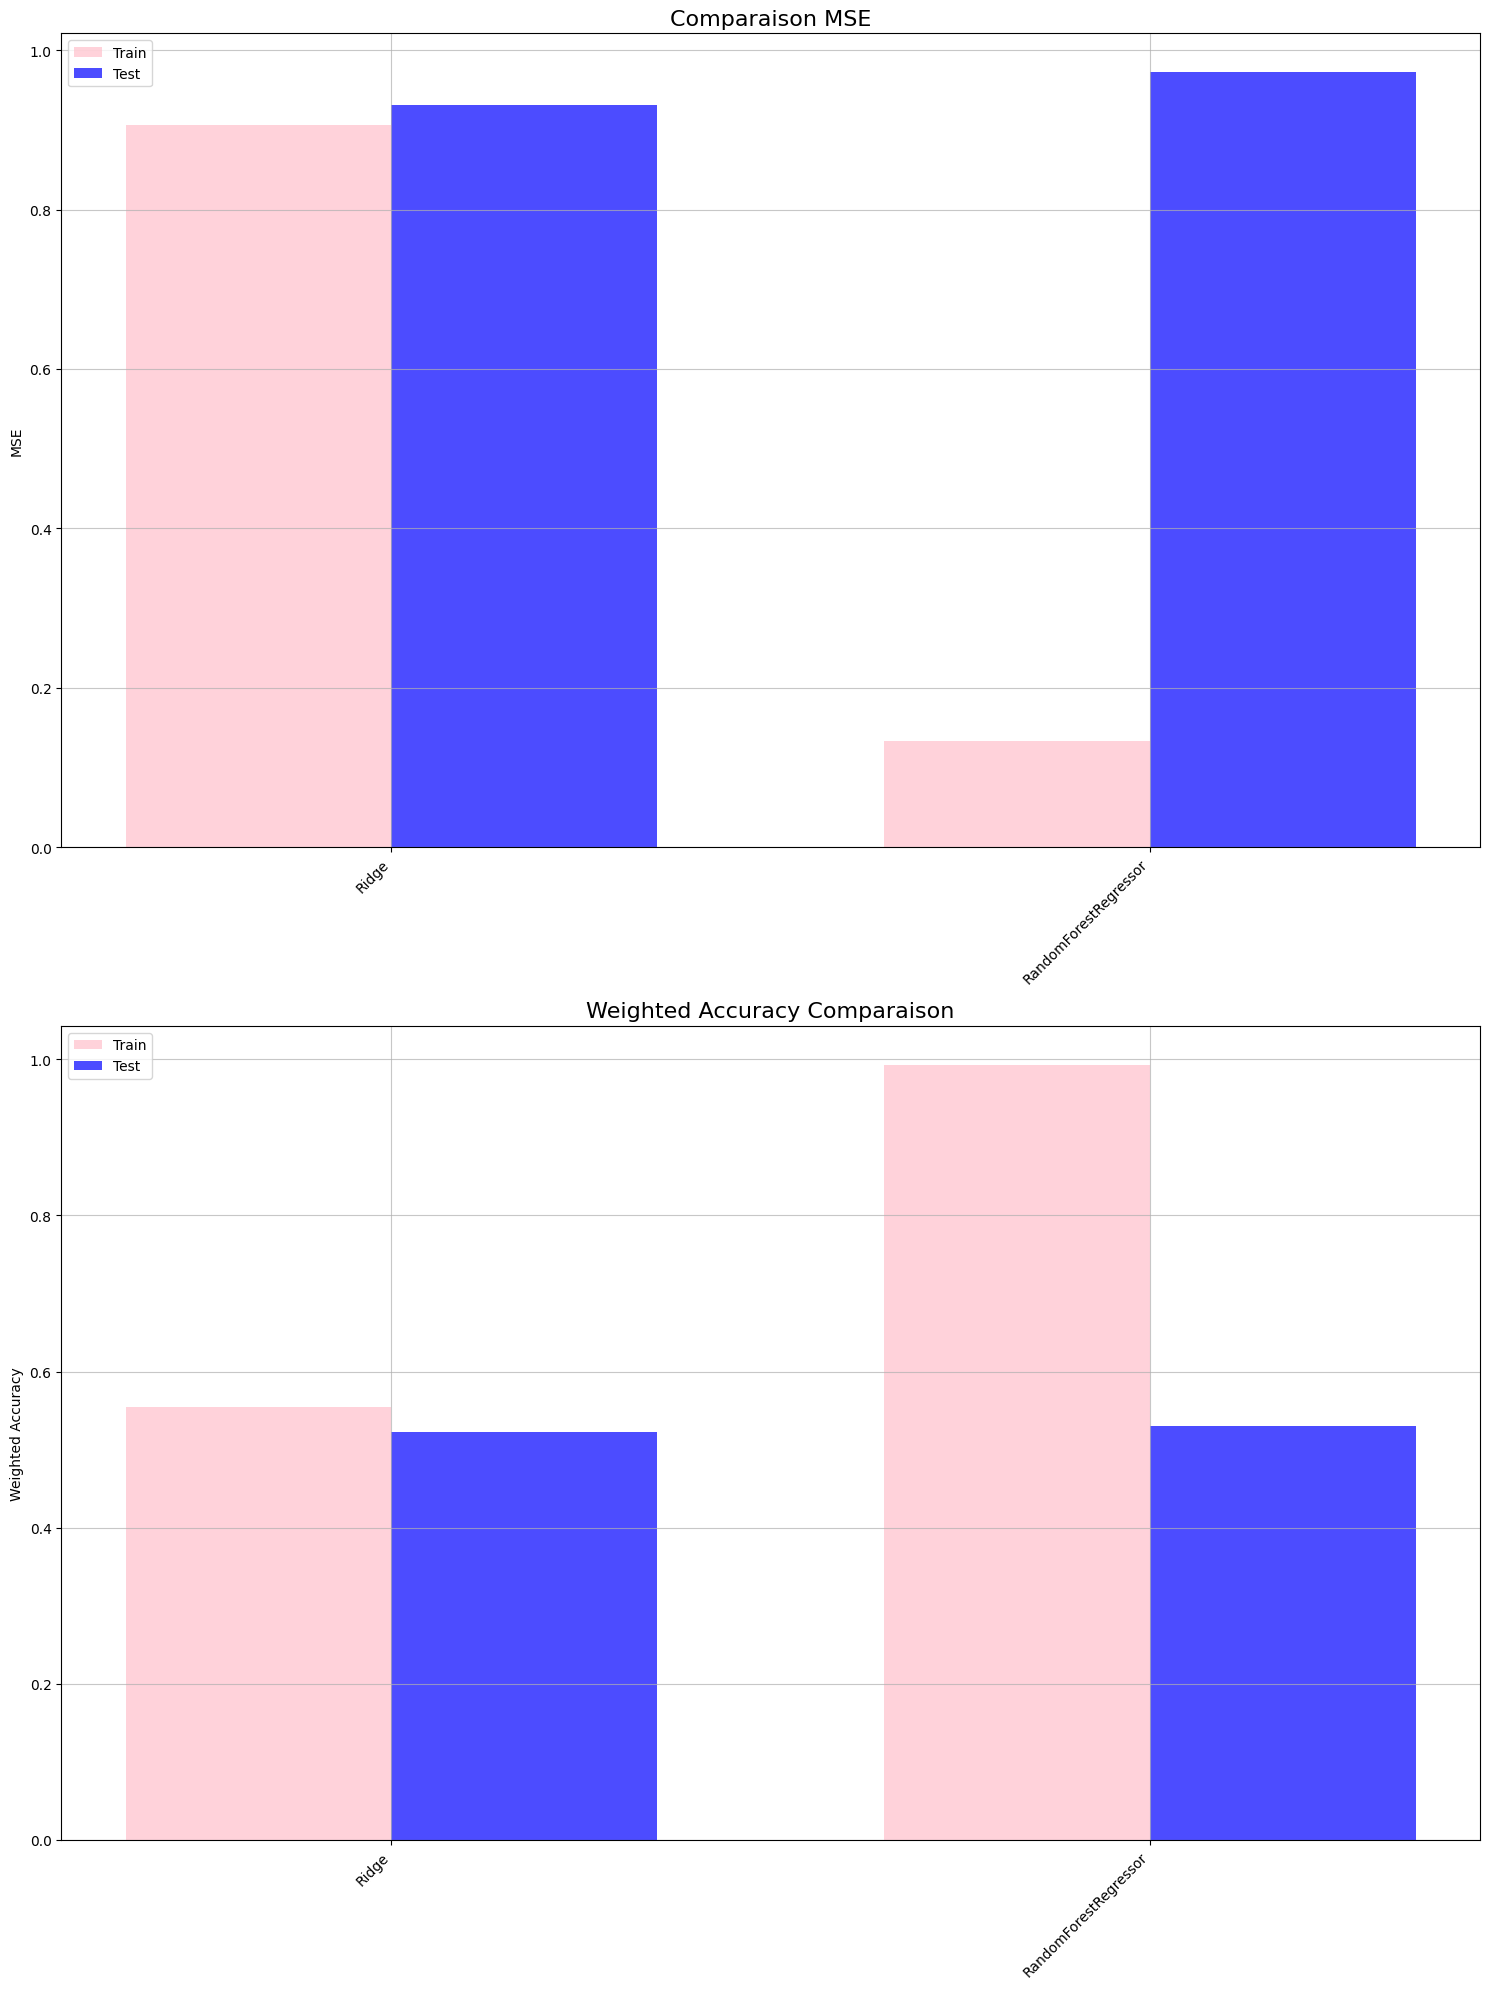

In [ ]:


from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


def train_and_evaluate(X_train, X_test, y_train, y_test, model):

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    w_acc_train = weighted_accuracy(y_train, y_pred_train)
    w_acc_test = weighted_accuracy(y_test, y_pred_test)

    return mse_train, mse_test, w_acc_train, w_acc_test



def run_multi_model_cv(X, y, models, n_splits=5):
    fold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = {name: {'mse_train': [], 'mse_test': [],
                      'w_acc_train': [], 'w_acc_test': []}
               for name in models.keys()}

    for train_index, test_index in fold.split(X, y):
        X_train, X_test = X.iloc[train_index].copy(), X.iloc[test_index].copy()
        y_train, y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()

        for name, model in models.items():
            mse_train, mse_test, w_acc_train, w_acc_test = train_and_evaluate(
                X_train, X_test, y_train, y_test, model
            )
            results[name]['mse_train'].append(mse_train)
            results[name]['mse_test'].append(mse_test)
            results[name]['w_acc_train'].append(w_acc_train)
            results[name]['w_acc_test'].append(w_acc_test)


    best_mean_w_acc = -1
    best_model = None

    for name, result in results.items():
        mean_w_acc_test = np.mean(result['w_acc_test'])
        if mean_w_acc_test > best_mean_w_acc:
            best_mean_w_acc = mean_w_acc_test
            best_model = name

    print(f"Best model {best_model} & mean weighted accuracy {best_mean_w_acc:.4f}")
    return results



baseline_models = {
    "Ridge": Ridge(),
    "RandomForestRegressor": RandomForestRegressor(n_jobs=-1, random_state=42)
}
results_baseline = run_multi_model_cv(X, y, baseline_models)
plot_multi_model_results(results_baseline)


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from scipy.stats import randint as sp_randint
try:
    from data_preprocessing import X, y, weighted_accuracy
except ImportError:
    print("WARNING: environment")
    pass


w_acc_scorer = make_scorer(weighted_accuracy, greater_is_better=True)
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
param_distributions = {
    'n_estimators': [200, 500, 800],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
cv_fold = KFold(n_splits=3, shuffle=True, random_state=42)
grid_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=20,
    scoring=w_acc_scorer,
    cv=cv_fold,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
grid_search.fit(X, y)
print("\n--- RF optimized---")
print(f"Weighted Accuracy CV: {grid_search.best_score_:.4f}")
print(f"Hyperparam: {grid_search.best_params_}")


best_rf_model = grid_search.best_estimator_
best_lgbm_model = best_rf_model

print(f"\nAverage WA {grid_search.best_score_:.4f}.")

Fitting 3 folds for each of 20 candidates, totalling 60 fits

--- Résultats de la Recherche Aléatoire (Random Forest Optimisé) ---
Meilleure Weighted Accuracy CV: 0.5348
Meilleurs Hyperparamètres: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}

Le modèle optimisé (Random Forest) a atteint une Weighted Accuracy moyenne de 0.5348 sur la Cross-Validation.


In [ ]:


from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import make_scorer



try:

    best_params = {
        'n_estimators': 200,
        'max_depth': 10,
        'min_samples_split': 5,
        'min_samples_leaf': 1,
        'max_features': 'log2',
        'random_state': 42,
        'n_jobs': -1
    }


    stability_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler()),
        ("model", RandomForestRegressor(**best_params))
    ])


    w_acc_scorer = make_scorer(weighted_accuracy, greater_is_better=True)




    cv_scores = cross_val_score(
        estimator=stability_pipeline,
        X=X,
        y=y,
        scoring=w_acc_scorer,
        cv=5,
        n_jobs=-1
    )


    mean_score = np.mean(cv_scores)
    std_dev = np.std(cv_scores)
    print(f"Scores par fold (Weighted Accuracy): {cv_scores}")
    print(f"Score Moyen CV: {mean_score:.4f}")
    print(f"Écart-type des scores: {std_dev:.4f}")
    if std_dev < 0.01:
        print("Très bien")
    elif std_dev < 0.03:
        print("Ca va ")
    else:
        print("TERRIBLE")

except NameError:
    print("Erreur: Assurez-vous que X, y, et weighted_accuracy sont définis.")
    pass

Scores par fold (Weighted Accuracy): [0.54330394 0.48452143 0.53038918 0.52602451 0.50714011]
Score Moyen CV: 0.5183
Écart-type des scores: 0.0205
Ca va 


In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
final_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=1,
        max_features='log2',
        random_state=42,
        n_jobs=-1
    ))
])
final_pipeline.fit(X, y)
test_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module6/exercise/module6_exercise_test.csv'
X_test = pd.read_csv('module6_exercise_test.csv', index_col='index')
y_pred_test = final_pipeline.predict(X_test)

submission = pd.DataFrame({
    'index': X_test.index,
    'end_of_day_return': y_pred_test
})
submission.to_csv('submission_module6.csv', index=False)


